In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('communities_data.csv',na_values=["?"])
df.head()

state numeric  county numeric  community numeric communityname string  \
0              8             NaN                NaN         Lakewoodcity   
1             53             NaN                NaN          Tukwilacity   
2             24             NaN                NaN         Aberdeentown   
3             34             5.0            81440.0  Willingborotownship   
4             42            95.0             6096.0    Bethlehemtownship   

   fold numeric  population numeric  householdsize numeric  \
0             1                0.19                   0.33   
1             1                0.00                   0.16   
2             1                0.00                   0.42   
3             1                0.04                   0.77   
4             1                0.01                   0.55   

   racepctblack numeric  racePctWhite numeric  racePctAsian numeric  \
0                  0.02                  0.90                  0.12   
1                  0.12                  0.74                  0.45   
2                  0.49                  0.56                  0.17   
3                  1.00                  0.08                  0.12   
4                  0.02                  0.95                  0.09   

              ...               LandArea numeric  PopDens numeric  \
0             ...                           0.12             0.26   
1             ...                           0.02             0.12   
2             ...                           0.01             0.21   
3             ...                           0.02             0.39   
4             ...                           0.04             0.09   

   PctUsePubTrans numeric  PolicCars numeric  PolicOperBudg numeric  \
0                    0.20               0.06                   0.04   
1                    0.45                NaN                    NaN   
2                    0.02                NaN                    NaN   
3                    0.28                NaN                    NaN   
4                    0.02                NaN                    NaN   

   LemasPctPolicOnPatr numeric  LemasGangUnitDeploy numeric  \
0                          0.9                          0.5   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   LemasPctOfficDrugUn numeric  PolicBudgPerPop numeric  \
0                         0.32                     0.14   
1                         0.00                      NaN   
2                         0.00                      NaN   
3                         0.00                      NaN   
4                         0.00                      NaN   

   ViolentCrimesPerPop numeric  
0                         0.20  
1                         0.67  
2                         0.43  
3                         0.12  
4                         0.03  

[5 rows x 128 columns]

# 1.a. Test and train datasets : Use the first 1495 rows of data as the training set and the rest as the test set.

In [3]:
train,test = df.iloc[:1495],df.iloc[1495:]

In [4]:
train.shape

(1495, 128)

In [5]:
train.head()

state numeric  county numeric  community numeric communityname string  \
0              8             NaN                NaN         Lakewoodcity   
1             53             NaN                NaN          Tukwilacity   
2             24             NaN                NaN         Aberdeentown   
3             34             5.0            81440.0  Willingborotownship   
4             42            95.0             6096.0    Bethlehemtownship   

   fold numeric  population numeric  householdsize numeric  \
0             1                0.19                   0.33   
1             1                0.00                   0.16   
2             1                0.00                   0.42   
3             1                0.04                   0.77   
4             1                0.01                   0.55   

   racepctblack numeric  racePctWhite numeric  racePctAsian numeric  \
0                  0.02                  0.90                  0.12   
1                  0.12                  0.74                  0.45   
2                  0.49                  0.56                  0.17   
3                  1.00                  0.08                  0.12   
4                  0.02                  0.95                  0.09   

              ...               LandArea numeric  PopDens numeric  \
0             ...                           0.12             0.26   
1             ...                           0.02             0.12   
2             ...                           0.01             0.21   
3             ...                           0.02             0.39   
4             ...                           0.04             0.09   

   PctUsePubTrans numeric  PolicCars numeric  PolicOperBudg numeric  \
0                    0.20               0.06                   0.04   
1                    0.45                NaN                    NaN   
2                    0.02                NaN                    NaN   
3                    0.28                NaN                    NaN   
4                    0.02                NaN                    NaN   

   LemasPctPolicOnPatr numeric  LemasGangUnitDeploy numeric  \
0                          0.9                          0.5   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   LemasPctOfficDrugUn numeric  PolicBudgPerPop numeric  \
0                         0.32                     0.14   
1                         0.00                      NaN   
2                         0.00                      NaN   
3                         0.00                      NaN   
4                         0.00                      NaN   

   ViolentCrimesPerPop numeric  
0                         0.20  
1                         0.67  
2                         0.43  
3                         0.12  
4                         0.03  

[5 rows x 128 columns]

In [6]:
test.shape

(499, 128)

In [7]:
test.head()

state numeric  county numeric  community numeric communityname string  \
1495              6             NaN                NaN       MillValleycity   
1496             48             NaN                NaN          LiveOakcity   
1497             35             NaN                NaN         Portalescity   
1498             42            17.0            25112.0        Fallstownship   
1499             51           683.0            48952.0         Manassascity   

      fold numeric  population numeric  householdsize numeric  \
1495             8                0.00                   0.20   
1496             8                0.00                   0.55   
1497             8                0.00                   0.52   
1498             8                0.04                   0.51   
1499             8                0.03                   0.59   

      racepctblack numeric  racePctWhite numeric  racePctAsian numeric  \
1495                  0.03                  0.91                  0.23   
1496                  0.13                  0.78                  0.15   
1497                  0.04                  0.59                  0.05   
1498                  0.07                  0.92                  0.09   
1499                  0.20                  0.75                  0.19   

                 ...               LandArea numeric  PopDens numeric  \
1495             ...                           0.01             0.23   
1496             ...                           0.01             0.18   
1497             ...                           0.01             0.18   
1498             ...                           0.06             0.13   
1499             ...                           0.03             0.23   

      PctUsePubTrans numeric  PolicCars numeric  PolicOperBudg numeric  \
1495                    0.73                NaN                    NaN   
1496                    0.02                NaN                    NaN   
1497                    0.00                NaN                    NaN   
1498                    0.16                NaN                    NaN   
1499                    0.06                NaN                    NaN   

      LemasPctPolicOnPatr numeric  LemasGangUnitDeploy numeric  \
1495                          NaN                          NaN   
1496                          NaN                          NaN   
1497                          NaN                          NaN   
1498                          NaN                          NaN   
1499                          NaN                          NaN   

      LemasPctOfficDrugUn numeric  PolicBudgPerPop numeric  \
1495                          0.0                      NaN   
1496                          0.0                      NaN   
1497                          0.0                      NaN   
1498                          0.0                      NaN   
1499                          0.0                      NaN   

      ViolentCrimesPerPop numeric  
1495                         0.12  
1496                         0.11  
1497                         0.12  
1498                         0.06  
1499                         0.12  

[5 rows x 128 columns]

# 1.b. Dealing with missing values by replacing NaN by mean and also using imputation technique to replace missing values and removing non-predictive features

### Removing non-predictive features

In [8]:
df.drop(['state numeric','county numeric','community numeric','communityname string','fold numeric'], axis=1,inplace=True)

In [9]:
df.head()

population numeric  householdsize numeric  racepctblack numeric  \
0                0.19                   0.33                  0.02   
1                0.00                   0.16                  0.12   
2                0.00                   0.42                  0.49   
3                0.04                   0.77                  1.00   
4                0.01                   0.55                  0.02   

   racePctWhite numeric  racePctAsian numeric  racePctHisp numeric  \
0                  0.90                  0.12                 0.17   
1                  0.74                  0.45                 0.07   
2                  0.56                  0.17                 0.04   
3                  0.08                  0.12                 0.10   
4                  0.95                  0.09                 0.05   

   agePct12t21 numeric  agePct12t29 numeric  agePct16t24 numeric  \
0                 0.34                 0.47                 0.29   
1                 0.26                 0.59                 0.35   
2                 0.39                 0.47                 0.28   
3                 0.51                 0.50                 0.34   
4                 0.38                 0.38                 0.23   

   agePct65up numeric             ...               LandArea numeric  \
0                0.32             ...                           0.12   
1                0.27             ...                           0.02   
2                0.32             ...                           0.01   
3                0.21             ...                           0.02   
4                0.36             ...                           0.04   

   PopDens numeric  PctUsePubTrans numeric  PolicCars numeric  \
0             0.26                    0.20               0.06   
1             0.12                    0.45                NaN   
2             0.21                    0.02                NaN   
3             0.39                    0.28                NaN   
4             0.09                    0.02                NaN   

   PolicOperBudg numeric  LemasPctPolicOnPatr numeric  \
0                   0.04                          0.9   
1                    NaN                          NaN   
2                    NaN                          NaN   
3                    NaN                          NaN   
4                    NaN                          NaN   

   LemasGangUnitDeploy numeric  LemasPctOfficDrugUn numeric  \
0                          0.5                         0.32   
1                          NaN                         0.00   
2                          NaN                         0.00   
3                          NaN                         0.00   
4                          NaN                         0.00   

   PolicBudgPerPop numeric  ViolentCrimesPerPop numeric  
0                     0.14                         0.20  
1                      NaN                         0.67  
2                      NaN                         0.43  
3                      NaN                         0.12  
4                      NaN                         0.03  

[5 rows x 123 columns]

### Filling missing values with mean

In [10]:
df_mean = df.fillna(df.mean(),inplace=False)

In [11]:
df_mean.head()

population numeric  householdsize numeric  racepctblack numeric  \
0                0.19                   0.33                  0.02   
1                0.00                   0.16                  0.12   
2                0.00                   0.42                  0.49   
3                0.04                   0.77                  1.00   
4                0.01                   0.55                  0.02   

   racePctWhite numeric  racePctAsian numeric  racePctHisp numeric  \
0                  0.90                  0.12                 0.17   
1                  0.74                  0.45                 0.07   
2                  0.56                  0.17                 0.04   
3                  0.08                  0.12                 0.10   
4                  0.95                  0.09                 0.05   

   agePct12t21 numeric  agePct12t29 numeric  agePct16t24 numeric  \
0                 0.34                 0.47                 0.29   
1                 0.26                 0.59                 0.35   
2                 0.39                 0.47                 0.28   
3                 0.51                 0.50                 0.34   
4                 0.38                 0.38                 0.23   

   agePct65up numeric             ...               LandArea numeric  \
0                0.32             ...                           0.12   
1                0.27             ...                           0.02   
2                0.32             ...                           0.01   
3                0.21             ...                           0.02   
4                0.36             ...                           0.04   

   PopDens numeric  PctUsePubTrans numeric  PolicCars numeric  \
0             0.26                    0.20           0.060000   
1             0.12                    0.45           0.163103   
2             0.21                    0.02           0.163103   
3             0.39                    0.28           0.163103   
4             0.09                    0.02           0.163103   

   PolicOperBudg numeric  LemasPctPolicOnPatr numeric  \
0               0.040000                     0.900000   
1               0.076708                     0.698589   
2               0.076708                     0.698589   
3               0.076708                     0.698589   
4               0.076708                     0.698589   

   LemasGangUnitDeploy numeric  LemasPctOfficDrugUn numeric  \
0                     0.500000                         0.32   
1                     0.440439                         0.00   
2                     0.440439                         0.00   
3                     0.440439                         0.00   
4                     0.440439                         0.00   

   PolicBudgPerPop numeric  ViolentCrimesPerPop numeric  
0                 0.140000                         0.20  
1                 0.195078                         0.67  
2                 0.195078                         0.43  
3                 0.195078                         0.12  
4                 0.195078                         0.03  

[5 rows x 123 columns]

## Filling missing values with sklearn impute(same as above)

In [12]:
from sklearn.impute import SimpleImputer
# make copy to avoid changing original data (when Imputing)
new_df = df.copy()
my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [13]:
new_df.head()

population numeric  householdsize numeric  racepctblack numeric  \
0                0.19                   0.33                  0.02   
1                0.00                   0.16                  0.12   
2                0.00                   0.42                  0.49   
3                0.04                   0.77                  1.00   
4                0.01                   0.55                  0.02   

   racePctWhite numeric  racePctAsian numeric  racePctHisp numeric  \
0                  0.90                  0.12                 0.17   
1                  0.74                  0.45                 0.07   
2                  0.56                  0.17                 0.04   
3                  0.08                  0.12                 0.10   
4                  0.95                  0.09                 0.05   

   agePct12t21 numeric  agePct12t29 numeric  agePct16t24 numeric  \
0                 0.34                 0.47                 0.29   
1                 0.26                 0.59                 0.35   
2                 0.39                 0.47                 0.28   
3                 0.51                 0.50                 0.34   
4                 0.38                 0.38                 0.23   

   agePct65up numeric             ...               LandArea numeric  \
0                0.32             ...                           0.12   
1                0.27             ...                           0.02   
2                0.32             ...                           0.01   
3                0.21             ...                           0.02   
4                0.36             ...                           0.04   

   PopDens numeric  PctUsePubTrans numeric  PolicCars numeric  \
0             0.26                    0.20           0.060000   
1             0.12                    0.45           0.163103   
2             0.21                    0.02           0.163103   
3             0.39                    0.28           0.163103   
4             0.09                    0.02           0.163103   

   PolicOperBudg numeric  LemasPctPolicOnPatr numeric  \
0               0.040000                     0.900000   
1               0.076708                     0.698589   
2               0.076708                     0.698589   
3               0.076708                     0.698589   
4               0.076708                     0.698589   

   LemasGangUnitDeploy numeric  LemasPctOfficDrugUn numeric  \
0                     0.500000                         0.32   
1                     0.440439                         0.00   
2                     0.440439                         0.00   
3                     0.440439                         0.00   
4                     0.440439                         0.00   

   PolicBudgPerPop numeric  ViolentCrimesPerPop numeric  
0                 0.140000                         0.20  
1                 0.195078                         0.67  
2                 0.195078                         0.43  
3                 0.195078                         0.12  
4                 0.195078                         0.03  

[5 rows x 123 columns]

In [14]:
new_train,new_test = new_df.iloc[:1495],new_df.iloc[1495:]

In [15]:
new_train.head()

population numeric  householdsize numeric  racepctblack numeric  \
0                0.19                   0.33                  0.02   
1                0.00                   0.16                  0.12   
2                0.00                   0.42                  0.49   
3                0.04                   0.77                  1.00   
4                0.01                   0.55                  0.02   

   racePctWhite numeric  racePctAsian numeric  racePctHisp numeric  \
0                  0.90                  0.12                 0.17   
1                  0.74                  0.45                 0.07   
2                  0.56                  0.17                 0.04   
3                  0.08                  0.12                 0.10   
4                  0.95                  0.09                 0.05   

   agePct12t21 numeric  agePct12t29 numeric  agePct16t24 numeric  \
0                 0.34                 0.47                 0.29   
1                 0.26                 0.59                 0.35   
2                 0.39                 0.47                 0.28   
3                 0.51                 0.50                 0.34   
4                 0.38                 0.38                 0.23   

   agePct65up numeric             ...               LandArea numeric  \
0                0.32             ...                           0.12   
1                0.27             ...                           0.02   
2                0.32             ...                           0.01   
3                0.21             ...                           0.02   
4                0.36             ...                           0.04   

   PopDens numeric  PctUsePubTrans numeric  PolicCars numeric  \
0             0.26                    0.20           0.060000   
1             0.12                    0.45           0.163103   
2             0.21                    0.02           0.163103   
3             0.39                    0.28           0.163103   
4             0.09                    0.02           0.163103   

   PolicOperBudg numeric  LemasPctPolicOnPatr numeric  \
0               0.040000                     0.900000   
1               0.076708                     0.698589   
2               0.076708                     0.698589   
3               0.076708                     0.698589   
4               0.076708                     0.698589   

   LemasGangUnitDeploy numeric  LemasPctOfficDrugUn numeric  \
0                     0.500000                         0.32   
1                     0.440439                         0.00   
2                     0.440439                         0.00   
3                     0.440439                         0.00   
4                     0.440439                         0.00   

   PolicBudgPerPop numeric  ViolentCrimesPerPop numeric  
0                 0.140000                         0.20  
1                 0.195078                         0.67  
2                 0.195078                         0.43  
3                 0.195078                         0.12  
4                 0.195078                         0.03  

[5 rows x 123 columns]

In [16]:
new_train.shape

(1495, 123)

In [17]:
new_test.head()

population numeric  householdsize numeric  racepctblack numeric  \
1495                0.00                   0.20                  0.03   
1496                0.00                   0.55                  0.13   
1497                0.00                   0.52                  0.04   
1498                0.04                   0.51                  0.07   
1499                0.03                   0.59                  0.20   

      racePctWhite numeric  racePctAsian numeric  racePctHisp numeric  \
1495                  0.91                  0.23                 0.05   
1496                  0.78                  0.15                 0.36   
1497                  0.59                  0.05                 0.62   
1498                  0.92                  0.09                 0.03   
1499                  0.75                  0.19                 0.10   

      agePct12t21 numeric  agePct12t29 numeric  agePct16t24 numeric  \
1495                 0.15                 0.19                 0.09   
1496                 0.48                 0.53                 0.30   
1497                 0.84                 0.78                 0.75   
1498                 0.38                 0.47                 0.27   
1499                 0.38                 0.62                 0.35   

      agePct65up numeric             ...               LandArea numeric  \
1495                0.42             ...                           0.01   
1496                0.10             ...                           0.01   
1497                0.43             ...                           0.01   
1498                0.35             ...                           0.06   
1499                0.11             ...                           0.03   

      PopDens numeric  PctUsePubTrans numeric  PolicCars numeric  \
1495             0.23                    0.73           0.163103   
1496             0.18                    0.02           0.163103   
1497             0.18                    0.00           0.163103   
1498             0.13                    0.16           0.163103   
1499             0.23                    0.06           0.163103   

      PolicOperBudg numeric  LemasPctPolicOnPatr numeric  \
1495               0.076708                     0.698589   
1496               0.076708                     0.698589   
1497               0.076708                     0.698589   
1498               0.076708                     0.698589   
1499               0.076708                     0.698589   

      LemasGangUnitDeploy numeric  LemasPctOfficDrugUn numeric  \
1495                     0.440439                          0.0   
1496                     0.440439                          0.0   
1497                     0.440439                          0.0   
1498                     0.440439                          0.0   
1499                     0.440439                          0.0   

      PolicBudgPerPop numeric  ViolentCrimesPerPop numeric  
1495                 0.195078                         0.12  
1496                 0.195078                         0.11  
1497                 0.195078                         0.12  
1498                 0.195078                         0.06  
1499                 0.195078                         0.12  

[5 rows x 123 columns]

In [18]:
new_test.shape

(499, 123)

# 1.c. Correlation matrix for the features in the dataset.

## Matplotlib

In [29]:
def plot_corr(df):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 15))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

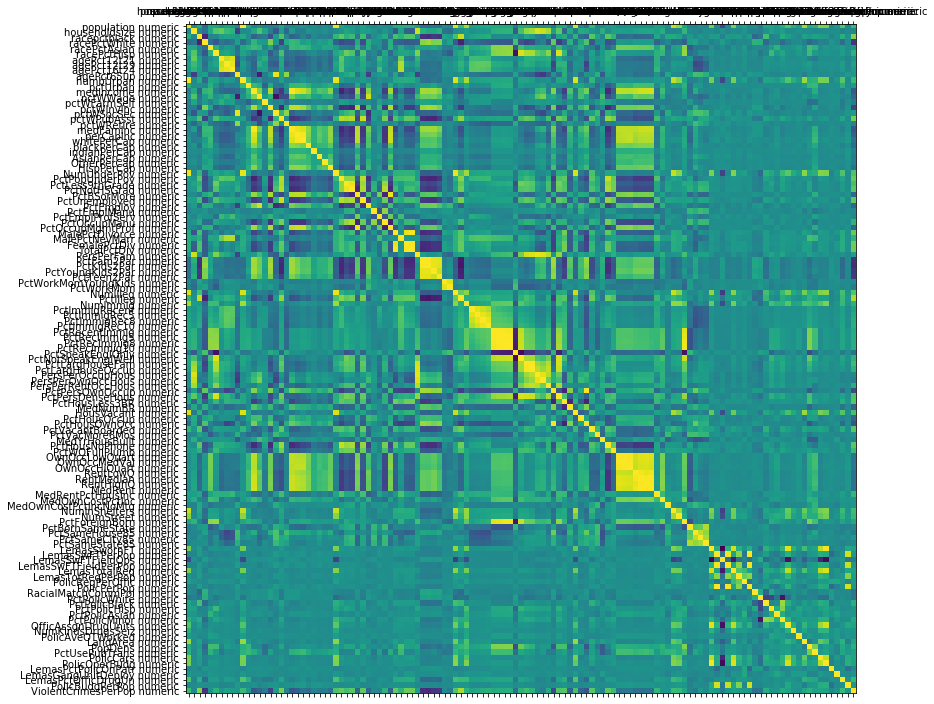

In [30]:
plot_corr(new_df)

## Seaborn

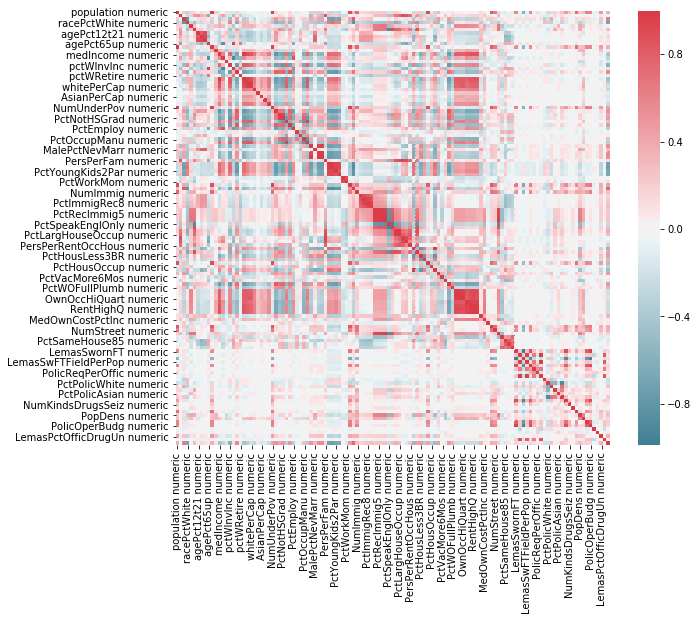

In [21]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = new_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

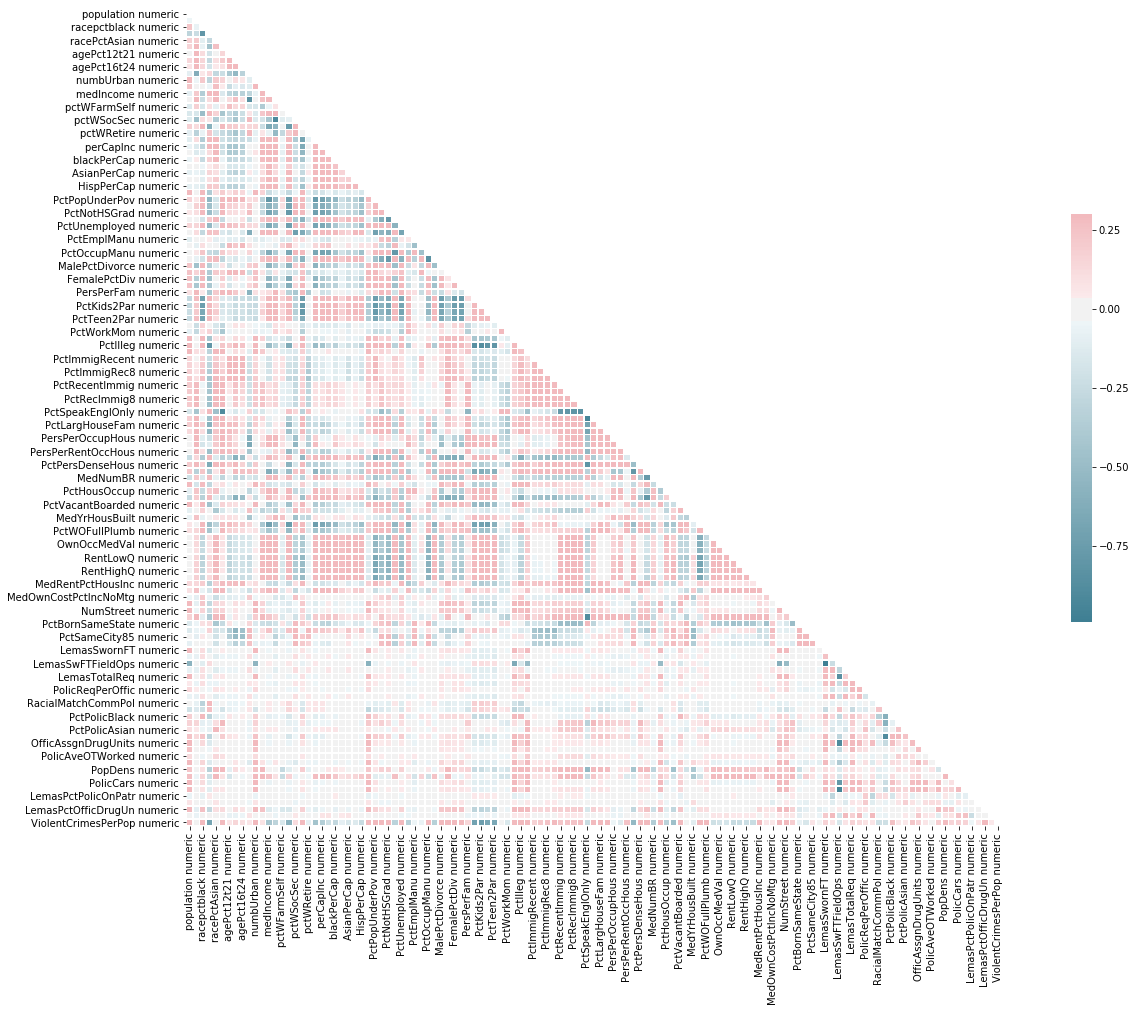

In [22]:
f, ax = plt.subplots(figsize=(25, 15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  # half of it as zero
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
corr = new_df.corr()
corr.style.background_gradient()

# 1.d. Calculate the Coefficient of Variation CV for each feature:

In [52]:
# CV = Variance/Mean

variance = new_df.var(axis=0)
mean = new_df.mean(axis=0)

cv = variance/mean

In [53]:
cv

population numeric              0.279637
householdsize numeric           0.057841
racepctblack numeric            0.357587
racePctWhite numeric            0.079015
racePctAsian numeric            0.283898
racePctHisp numeric             0.375306
agePct12t21 numeric             0.056777
agePct12t29 numeric             0.041733
agePct16t24 numeric             0.082446
agePct65up numeric              0.075875
numbUrban numeric               0.256736
pctUrban numeric                0.284167
medIncome numeric               0.121379
pctWWage numeric                0.059942
pctWFarmSelf numeric            0.142881
pctWInvInc numeric              0.063970
pctWSocSec numeric              0.063981
pctWPubAsst numeric             0.155280
pctWRetire numeric              0.058587
medFamInc numeric               0.104626
perCapInc numeric               0.104275
whitePerCap numeric             0.094813
blackPerCap numeric             0.101149
indianPerCap numeric            0.133416
AsianPerCap nume

# 1.e. Picking features with highest CV

In [72]:
cv_sort = cv.sort_values(ascending=False)

In [85]:
cv_features = cv_sort.head(math.floor(math.sqrt(128)))

In [97]:
cv_features.index

Index(['LemasPctOfficDrugUn numeric', 'NumStreet numeric',
       'racePctHisp numeric', 'NumInShelters numeric', 'racepctblack numeric',
       'NumIlleg numeric', 'PctUsePubTrans numeric',
       'PctNotSpeakEnglWell numeric', 'PctRecImmig5 numeric',
       'PctRecentImmig numeric', 'PctRecImmig8 numeric'],
      dtype='object')

## Scatterplots

In [114]:
new_features_df = new_df[['LemasPctOfficDrugUn numeric','NumStreet numeric', 'racePctHisp numeric', 'NumInShelters numeric', 'racepctblack numeric', 'NumIlleg numeric', 'PctUsePubTrans numeric','PctNotSpeakEnglWell numeric', 'PctRecImmig5 numeric','PctRecentImmig numeric', 'PctRecImmig8 numeric']]

In [115]:
new_features_df

LemasPctOfficDrugUn numeric  NumStreet numeric  racePctHisp numeric  \
0                            0.32               0.00                 0.17   
1                            0.00               0.00                 0.07   
2                            0.00               0.00                 0.04   
3                            0.00               0.00                 0.10   
4                            0.00               0.00                 0.05   
5                            0.00               0.00                 0.25   
6                            0.00               0.00                 0.02   
7                            0.00               0.00                 1.00   
8                            0.00               0.00                 0.00   
9                            0.00               0.00                 0.03   
10                           0.00               0.14                 0.41   
11                           0.00               0.00                 0.10   
12                           0.00               0.00                 0.02   
13                           0.00               0.00                 0.01   
14                           0.00               0.11                 0.26   
15                           0.00               0.00                 0.03   
16                           0.88               0.02                 0.06   
17                           0.00               0.00                 0.03   
18                           0.00               0.00                 0.02   
19                           0.00               0.00                 0.01   
20                           0.76               0.09                 0.30   
21                           0.31               0.36                 0.05   
22                           0.00               0.00                 0.11   
23                           0.56               0.01                 0.06   
24                           0.00               0.00                 1.00   
25                           0.00               0.00                 0.09   
26                           0.00               0.00                 0.43   
27                           0.00               0.00                 0.01   
28                           0.00               0.00                 0.01   
29                           0.00               0.00                 0.02   
...                           ...                ...                  ...   
1964                         0.00               0.00                 0.14   
1965                         0.44               0.31                 0.02   
1966                         0.00               0.29                 0.45   
1967                         0.00               0.00                 0.02   
1968                         0.00               0.01                 0.11   
1969                         0.64               1.00                 0.26   
1970                         0.00               0.00                 0.02   
1971                         0.00               0.00                 0.01   
1972                         0.00               0.06                 0.35   
1973                         0.00               0.00                 0.01   
1974                         0.00               0.00                 0.01   
1975                         0.00               0.00                 0.04   
1976                         0.00               0.00                 0.03   
1977                         0.00               0.00                 0.01   
1978                         0.00               0.00                 0.04   
1979                         0.00               0.01                 0.14   
1980                         0.00               0.00                 0.09   
1981                         0.62               0.00                 0.04   
1982                         0.00               0.00                 0.01   
1983                         0.00               0.00                 0.05   
19

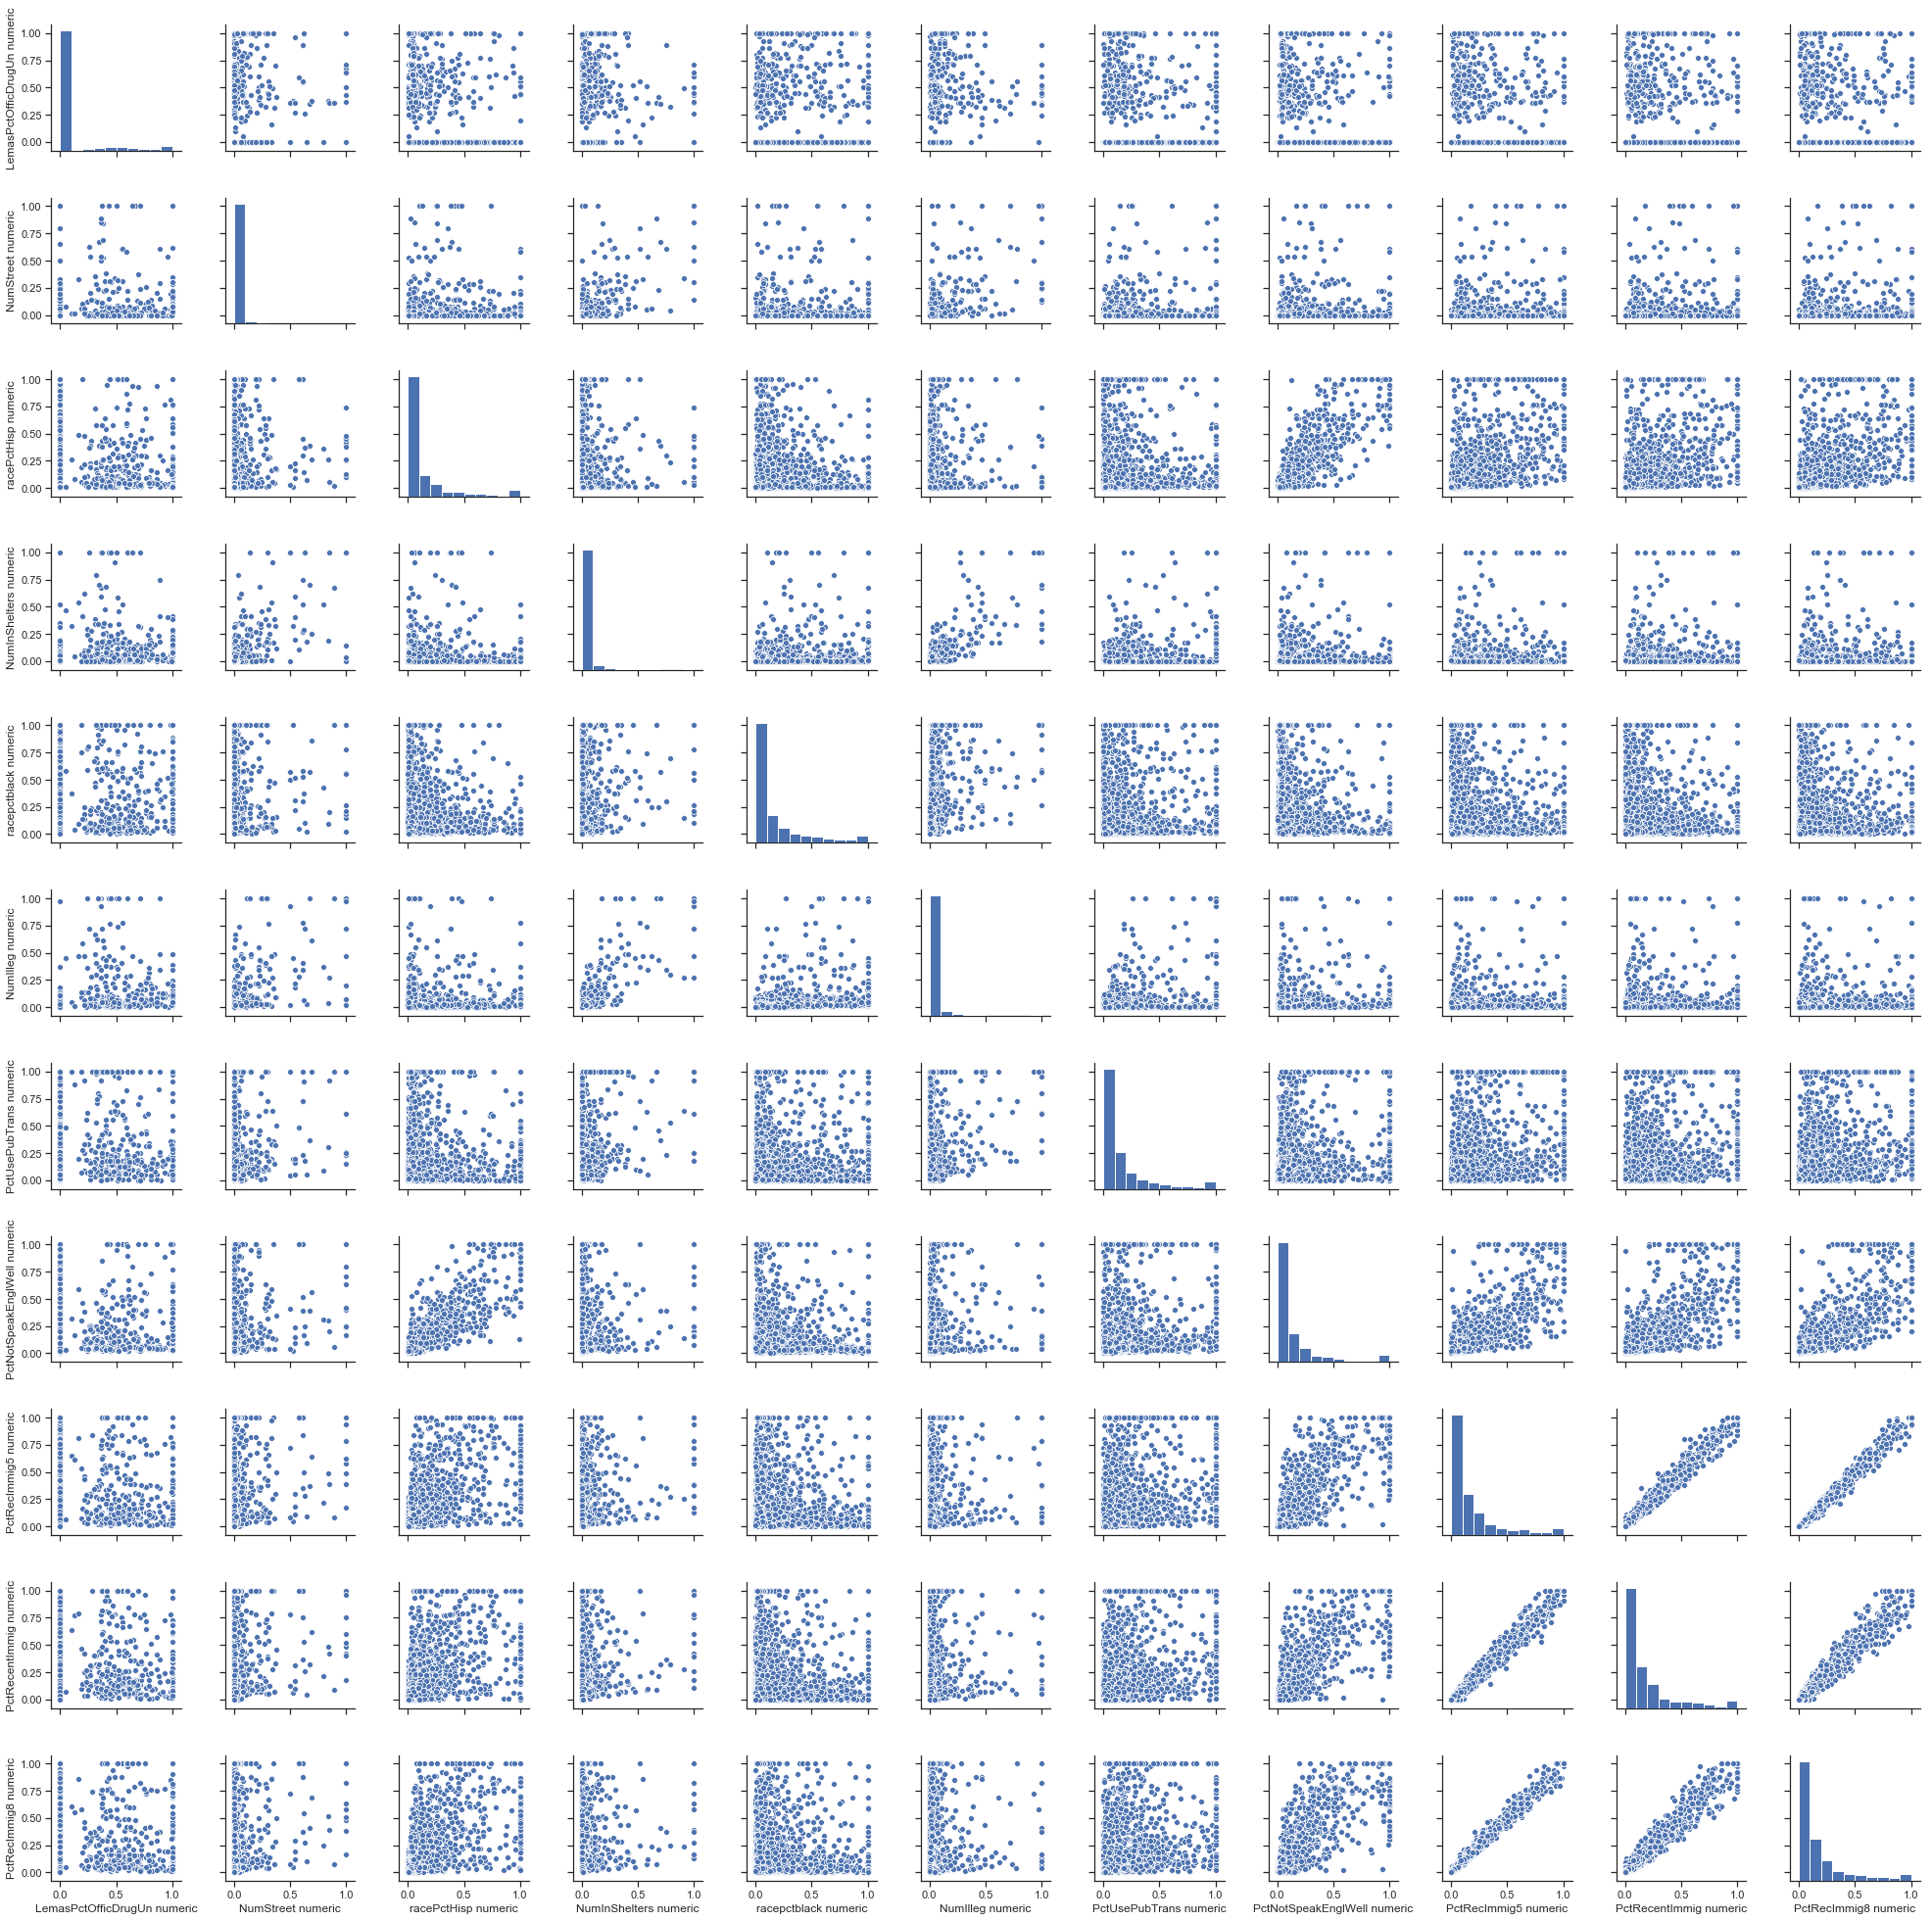

In [116]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(new_features_df)

In [ ]:
#Inserting the goal feature back to the data along with the selected features
new_features_df['ViolentCrimesPerPop numeric'] = new_df['ViolentCrimesPerPop numeric']

In [120]:
new_features_df

LemasPctOfficDrugUn numeric  NumStreet numeric  racePctHisp numeric  \
0                            0.32               0.00                 0.17   
1                            0.00               0.00                 0.07   
2                            0.00               0.00                 0.04   
3                            0.00               0.00                 0.10   
4                            0.00               0.00                 0.05   
5                            0.00               0.00                 0.25   
6                            0.00               0.00                 0.02   
7                            0.00               0.00                 1.00   
8                            0.00               0.00                 0.00   
9                            0.00               0.00                 0.03   
10                           0.00               0.14                 0.41   
11                           0.00               0.00                 0.10   
12                           0.00               0.00                 0.02   
13                           0.00               0.00                 0.01   
14                           0.00               0.11                 0.26   
15                           0.00               0.00                 0.03   
16                           0.88               0.02                 0.06   
17                           0.00               0.00                 0.03   
18                           0.00               0.00                 0.02   
19                           0.00               0.00                 0.01   
20                           0.76               0.09                 0.30   
21                           0.31               0.36                 0.05   
22                           0.00               0.00                 0.11   
23                           0.56               0.01                 0.06   
24                           0.00               0.00                 1.00   
25                           0.00               0.00                 0.09   
26                           0.00               0.00                 0.43   
27                           0.00               0.00                 0.01   
28                           0.00               0.00                 0.01   
29                           0.00               0.00                 0.02   
...                           ...                ...                  ...   
1964                         0.00               0.00                 0.14   
1965                         0.44               0.31                 0.02   
1966                         0.00               0.29                 0.45   
1967                         0.00               0.00                 0.02   
1968                         0.00               0.01                 0.11   
1969                         0.64               1.00                 0.26   
1970                         0.00               0.00                 0.02   
1971                         0.00               0.00                 0.01   
1972                         0.00               0.06                 0.35   
1973                         0.00               0.00                 0.01   
1974                         0.00               0.00                 0.01   
1975                         0.00               0.00                 0.04   
1976                         0.00               0.00                 0.03   
1977                         0.00               0.00                 0.01   
1978                         0.00               0.00                 0.04   
1979                         0.00               0.01                 0.14   
1980                         0.00               0.00                 0.09   
1981                         0.62               0.00                 0.04   
1982                         0.00               0.00                 0.01   
1983                         0.00               0.00                 0.05   
19

In [126]:
X = new_features_df.iloc[:,:11]
Y = new_features_df.iloc[:,11:]

In [128]:
X.head()

LemasPctOfficDrugUn numeric  NumStreet numeric  racePctHisp numeric  \
0                         0.32                0.0                 0.17   
1                         0.00                0.0                 0.07   
2                         0.00                0.0                 0.04   
3                         0.00                0.0                 0.10   
4                         0.00                0.0                 0.05   

   NumInShelters numeric  racepctblack numeric  NumIlleg numeric  \
0                   0.04                  0.02              0.04   
1                   0.00                  0.12              0.00   
2                   0.00                  0.49              0.01   
3                   0.00                  1.00              0.03   
4                   0.00                  0.02              0.00   

   PctUsePubTrans numeric  PctNotSpeakEnglWell numeric  PctRecImmig5 numeric  \
0                    0.20                         0.06                  0.07   
1                    0.45                         0.10                  0.27   
2                    0.02                         0.04                  0.02   
3                    0.28                         0.08                  0.08   
4                    0.02                         0.05                  0.02   

   PctRecentImmig numeric  PctRecImmig8 numeric  
0                    0.07                  0.08  
1                    0.25                  0.25  
2                    0.02                  0.04  
3                    0.05                  0.11  
4                    0.01                  0.04

In [129]:
Y.head()

ViolentCrimesPerPop numeric
0                         0.20
1                         0.67
2                         0.43
3                         0.12
4                         0.03

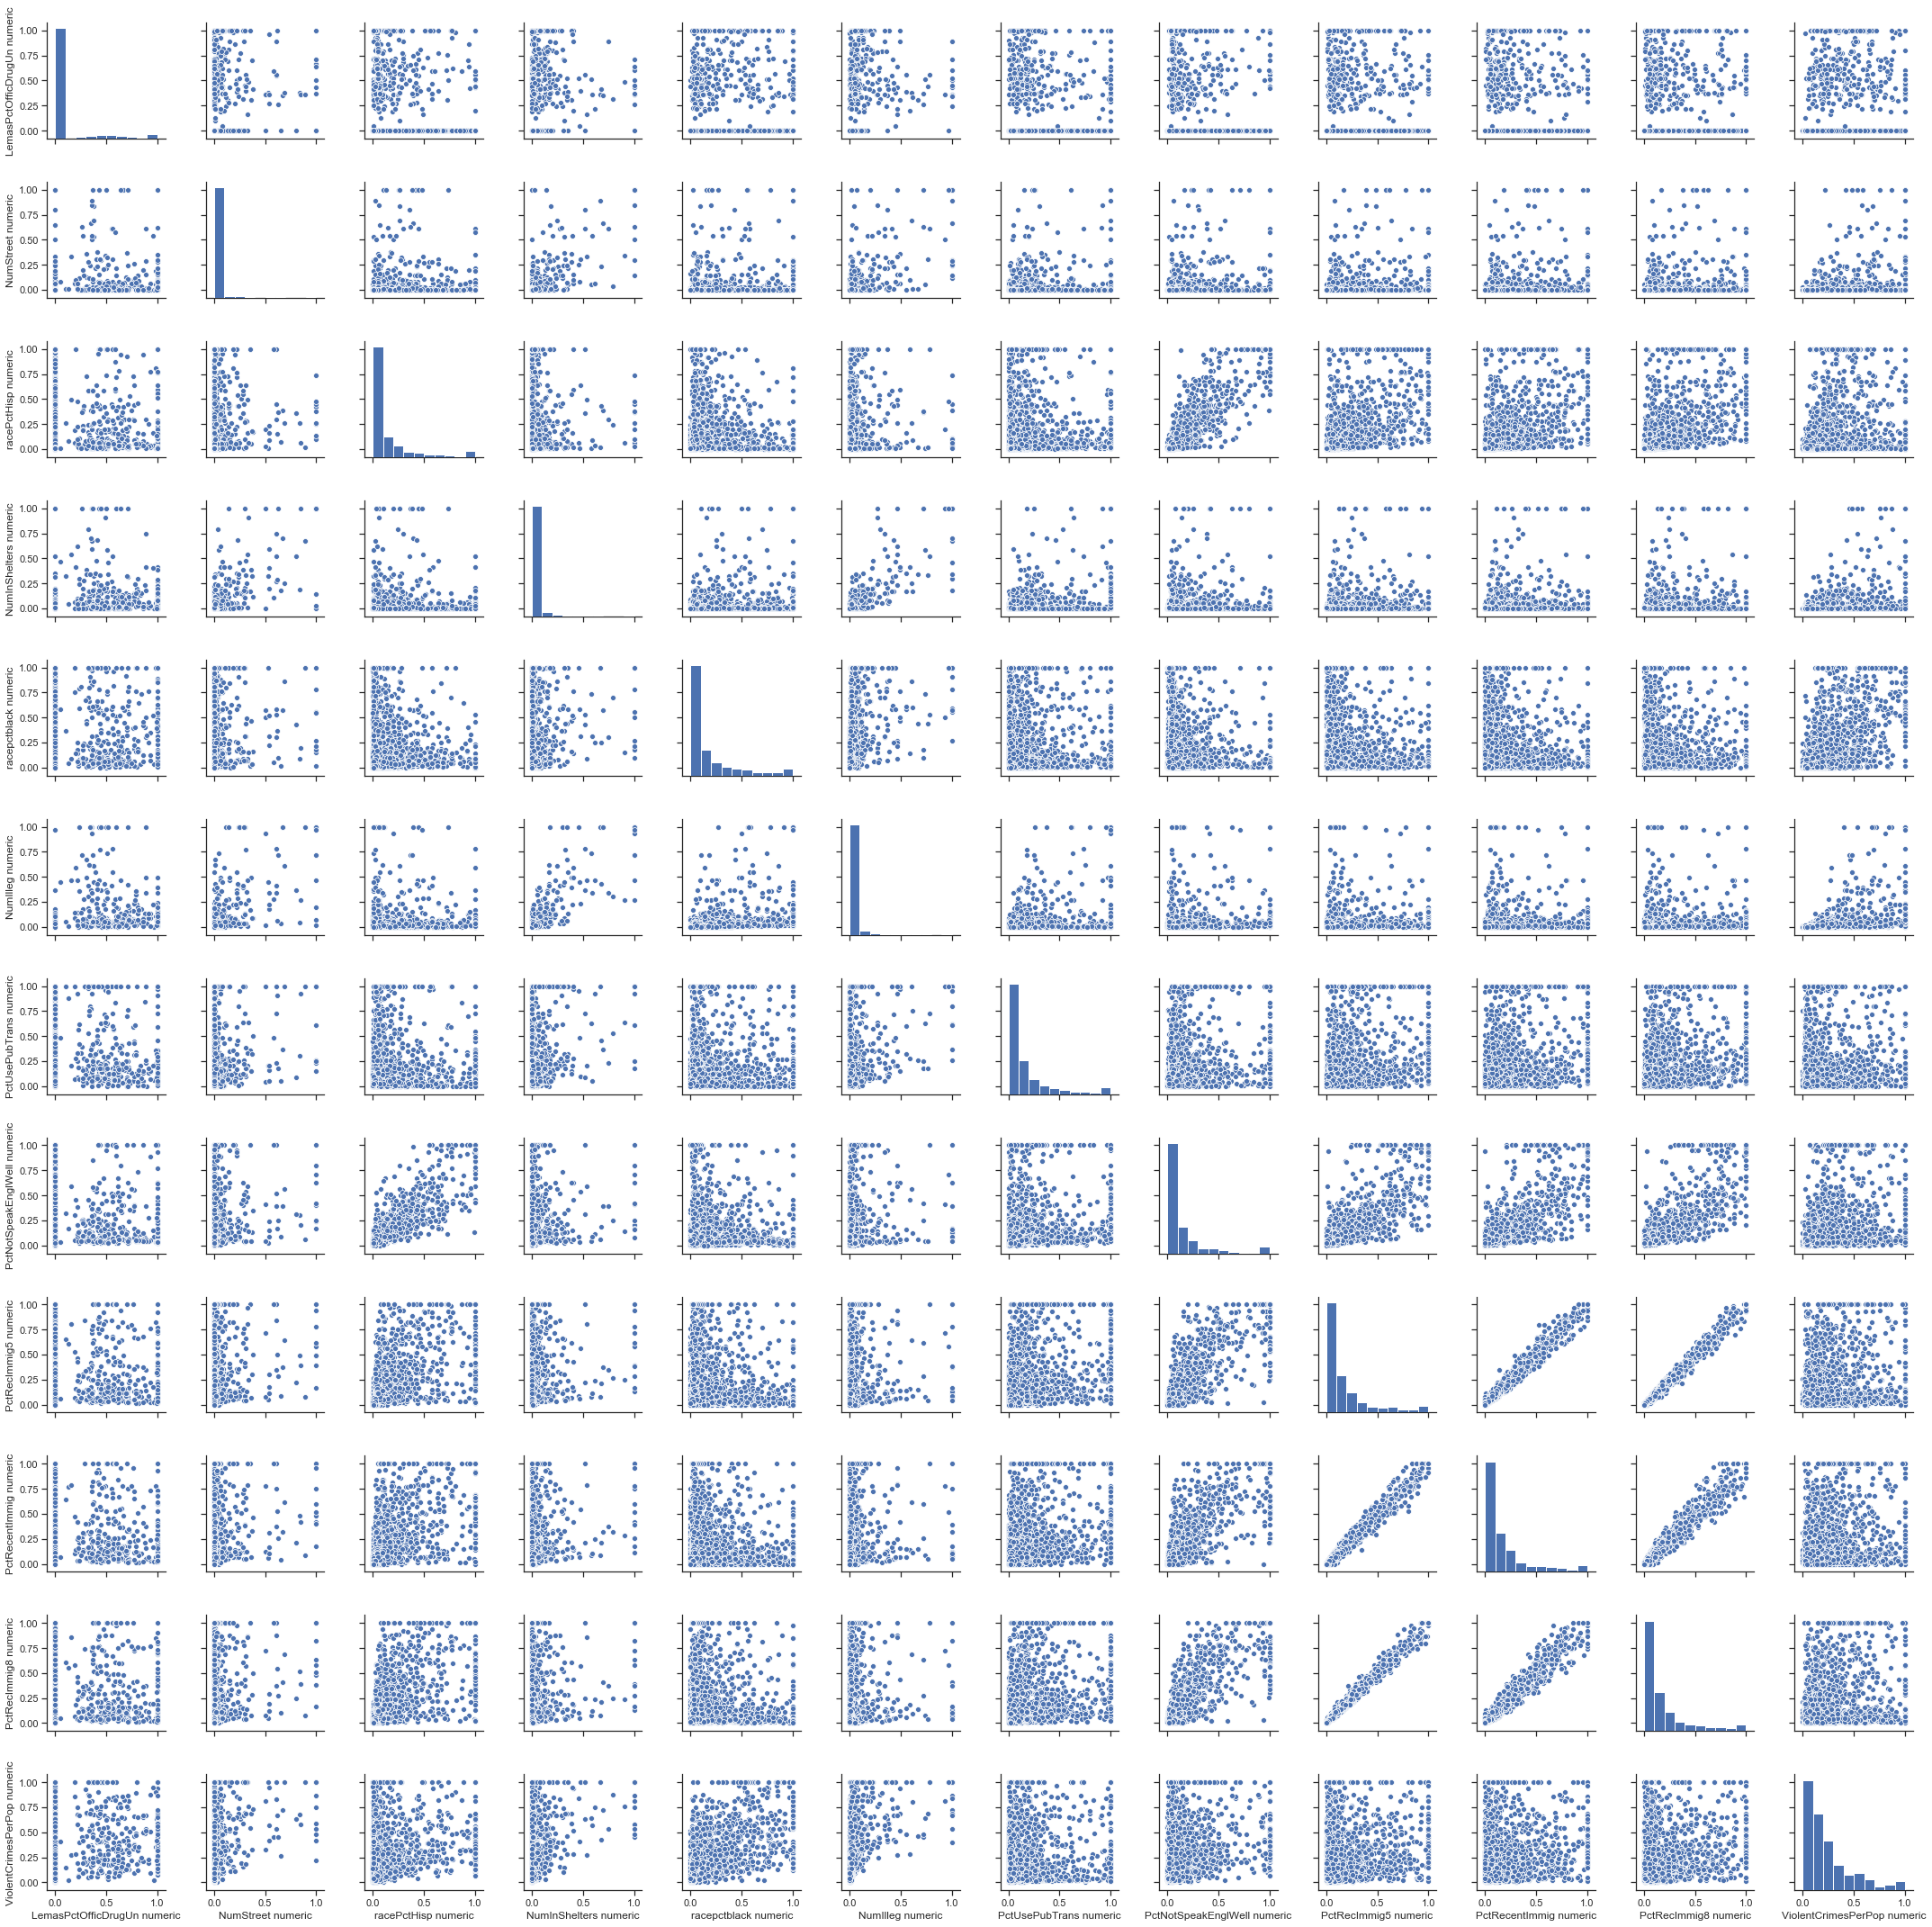

In [132]:
pp = pd.concat([X,Y], axis=1)    
g = sns.pairplot(pp)
plt.show()

## Boxplots of the selected features

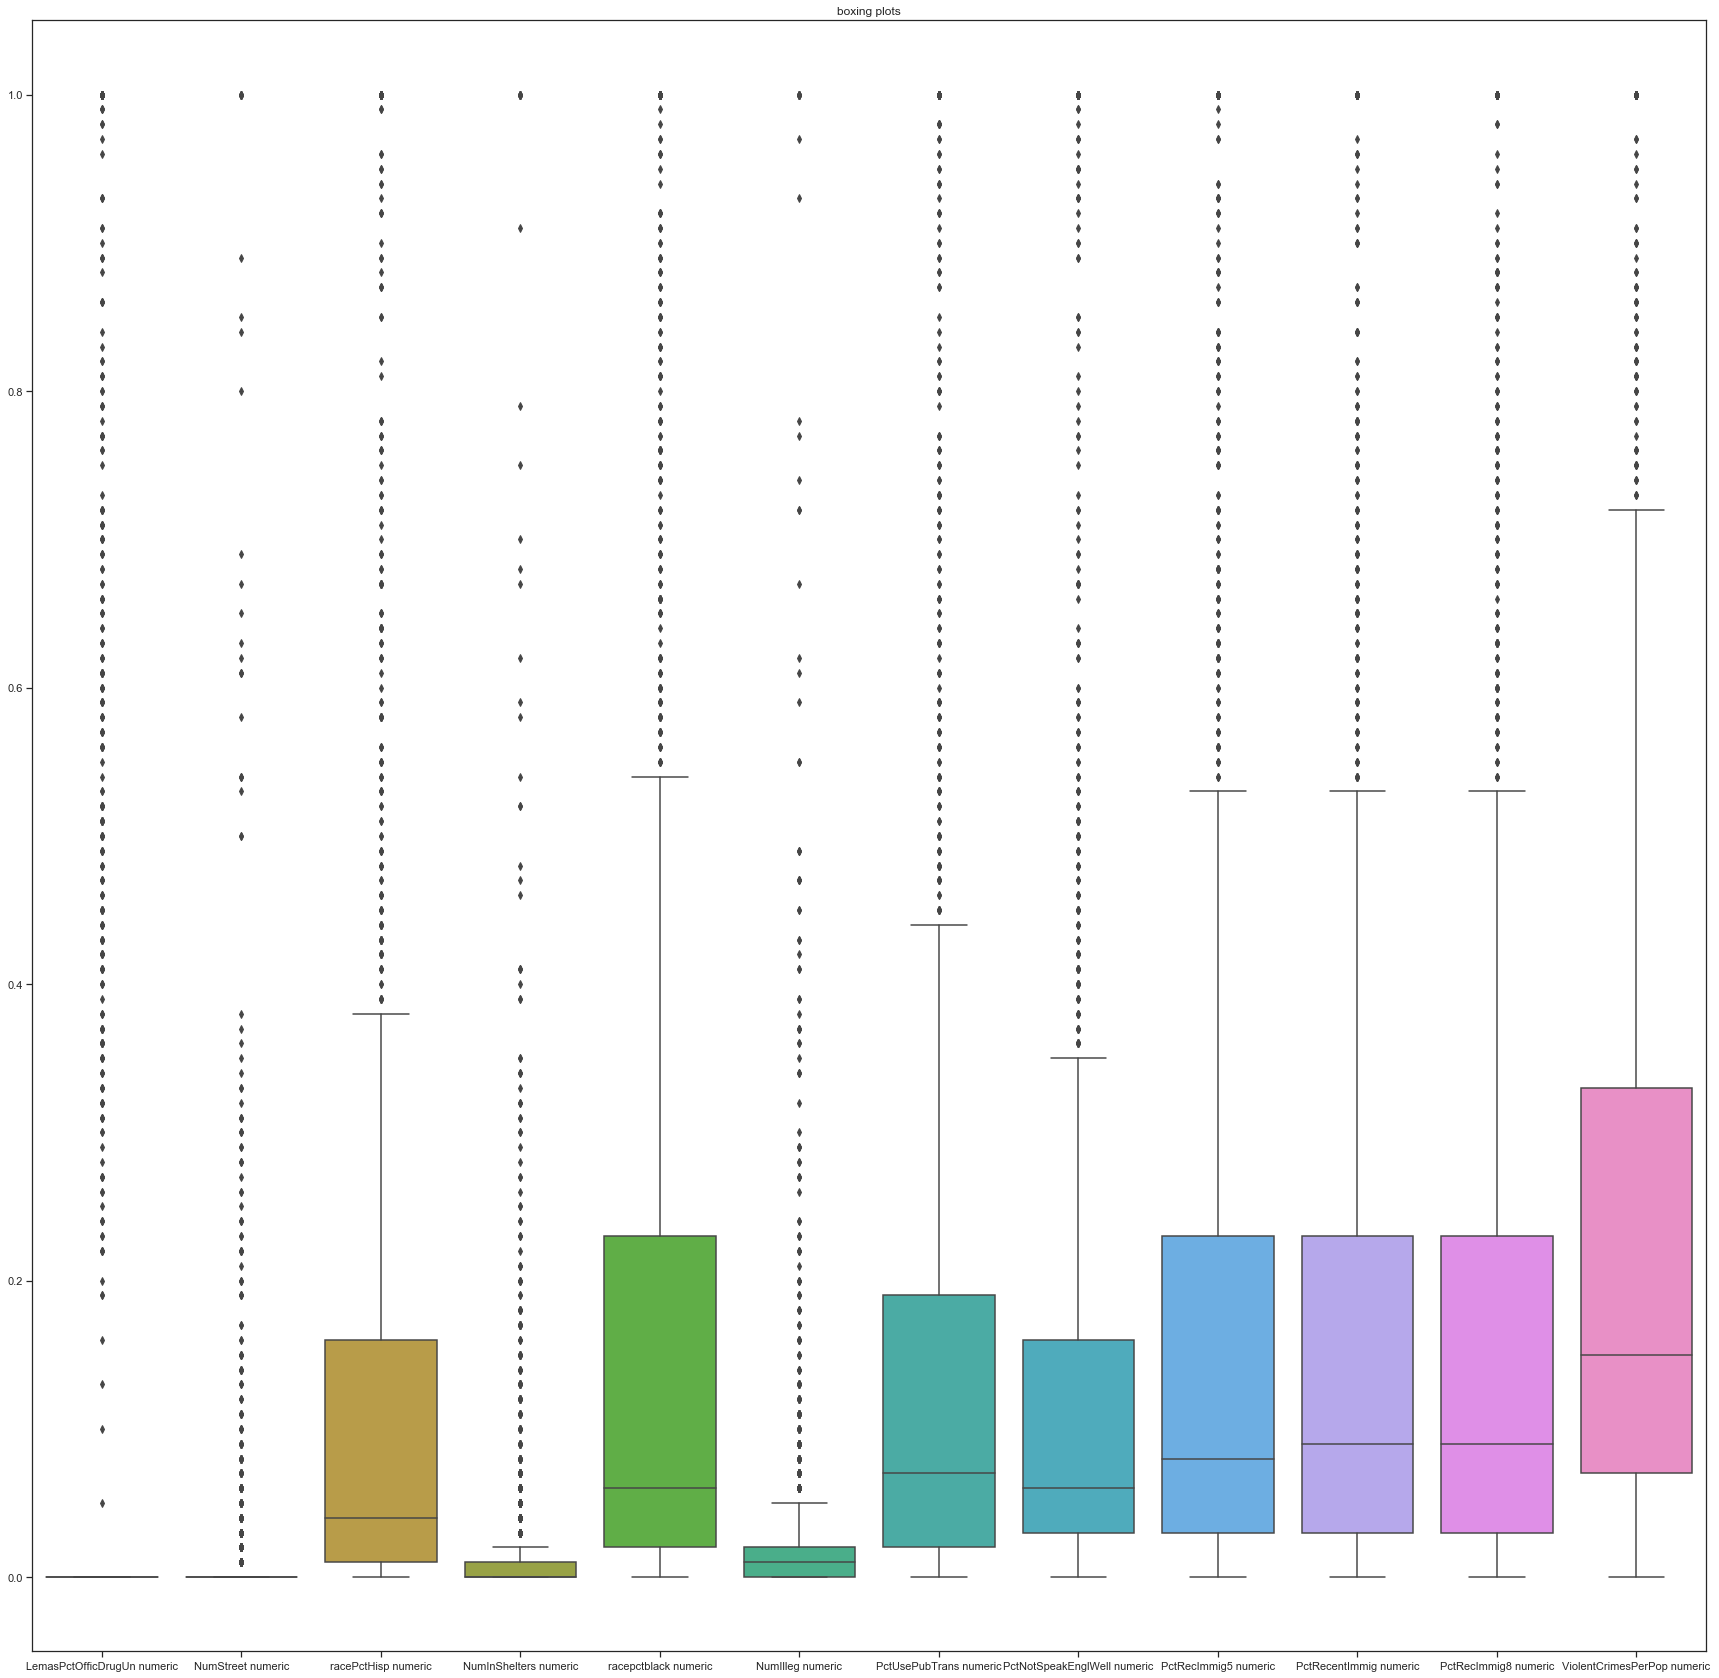

In [137]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
sns.boxplot(data=new_features_df)
ax.set(title="boxing plots")
ax.set_xticklabels(new_features_df.columns)
plt.show()

## Although we do get some information about the nature of the features from scatter plots and boxplots, we cannot draw conclusions on the features just by looking at the scatter plots

# 1.f. Fit a linear model using least squares to the training set and report the test error.

In [163]:
new_df.head()
trainx,trainy= new_train.iloc[:,0:122],new_train.iloc[:,122:]
testx,testy= new_test.iloc[:,0:122],new_test.iloc[:,122:]

In [164]:
trainx.head()

population numeric  householdsize numeric  racepctblack numeric  \
0                0.19                   0.33                  0.02   
1                0.00                   0.16                  0.12   
2                0.00                   0.42                  0.49   
3                0.04                   0.77                  1.00   
4                0.01                   0.55                  0.02   

   racePctWhite numeric  racePctAsian numeric  racePctHisp numeric  \
0                  0.90                  0.12                 0.17   
1                  0.74                  0.45                 0.07   
2                  0.56                  0.17                 0.04   
3                  0.08                  0.12                 0.10   
4                  0.95                  0.09                 0.05   

   agePct12t21 numeric  agePct12t29 numeric  agePct16t24 numeric  \
0                 0.34                 0.47                 0.29   
1                 0.26                 0.59                 0.35   
2                 0.39                 0.47                 0.28   
3                 0.51                 0.50                 0.34   
4                 0.38                 0.38                 0.23   

   agePct65up numeric           ...             PolicAveOTWorked numeric  \
0                0.32           ...                             0.290000   
1                0.27           ...                             0.305987   
2                0.32           ...                             0.305987   
3                0.21           ...                             0.305987   
4                0.36           ...                             0.305987   

   LandArea numeric  PopDens numeric  PctUsePubTrans numeric  \
0              0.12             0.26                    0.20   
1              0.02             0.12                    0.45   
2              0.01             0.21                    0.02   
3              0.02             0.39                    0.28   
4              0.04             0.09                    0.02   

   PolicCars numeric  PolicOperBudg numeric  LemasPctPolicOnPatr numeric  \
0           0.060000               0.040000                     0.900000   
1           0.163103               0.076708                     0.698589   
2           0.163103               0.076708                     0.698589   
3           0.163103               0.076708                     0.698589   
4           0.163103               0.076708                     0.698589   

   LemasGangUnitDeploy numeric  LemasPctOfficDrugUn numeric  \
0                     0.500000                         0.32   
1                     0.440439                         0.00   
2                     0.440439                         0.00   
3                     0.440439                         0.00   
4                     0.440439                         0.00   

   PolicBudgPerPop numeric  
0                 0.140000  
1                 0.195078  
2                 0.195078  
3                 0.195078  
4                 0.195078  

[5 rows x 122 columns]

In [167]:
trainy.head()

ViolentCrimesPerPop numeric
0                         0.20
1                         0.67
2                         0.43
3                         0.12
4                         0.03

In [207]:
reg = LinearRegression().fit(trainx, trainy)
print('Train Score: %s'%reg.score(trainx,trainy))
print('Test Score: %s'%reg.score(testx,testy))

Train Score: 0.7118547341428724
Test Score: -15.60646695125877


In [184]:
y_pred = reg.predict(testx)

In [194]:
print("Mean Squared Error with all features : %f" % mean_squared_error(y_pred,testy))

Mean Squared Error with all features : 0.789726


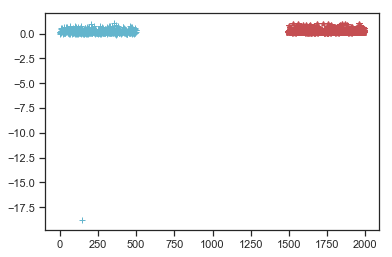

In [253]:
plt.plot(y_pred, 'c+')
plt.plot(testy, 'r*')

### Linear Regression for selected features

In [174]:
newf_train = new_features_df.iloc[:1495,:]
newf_test = new_features_df.iloc[1495:,:]
trainX = newf_train.iloc[:,:11]
trainY = newf_train.iloc[:,11:]
testX = newf_test.iloc[:,:11]
testY = newf_test.iloc[:,11:]

In [175]:
newf_train.head()

LemasPctOfficDrugUn numeric  NumStreet numeric  racePctHisp numeric  \
0                         0.32                0.0                 0.17   
1                         0.00                0.0                 0.07   
2                         0.00                0.0                 0.04   
3                         0.00                0.0                 0.10   
4                         0.00                0.0                 0.05   

   NumInShelters numeric  racepctblack numeric  NumIlleg numeric  \
0                   0.04                  0.02              0.04   
1                   0.00                  0.12              0.00   
2                   0.00                  0.49              0.01   
3                   0.00                  1.00              0.03   
4                   0.00                  0.02              0.00   

   PctUsePubTrans numeric  PctNotSpeakEnglWell numeric  PctRecImmig5 numeric  \
0                    0.20                         0.06                  0.07   
1                    0.45                         0.10                  0.27   
2                    0.02                         0.04                  0.02   
3                    0.28                         0.08                  0.08   
4                    0.02                         0.05                  0.02   

   PctRecentImmig numeric  PctRecImmig8 numeric  ViolentCrimesPerPop numeric  
0                    0.07                  0.08                         0.20  
1                    0.25                  0.25                         0.67  
2                    0.02                  0.04                         0.43  
3                    0.05                  0.11                         0.12  
4                    0.01                  0.04                         0.03

In [176]:
newf_test.head()

LemasPctOfficDrugUn numeric  NumStreet numeric  racePctHisp numeric  \
1495                          0.0                0.0                 0.05   
1496                          0.0                0.0                 0.36   
1497                          0.0                0.0                 0.62   
1498                          0.0                0.0                 0.03   
1499                          0.0                0.0                 0.10   

      NumInShelters numeric  racepctblack numeric  NumIlleg numeric  \
1495                    0.0                  0.03              0.00   
1496                    0.0                  0.13              0.00   
1497                    0.0                  0.04              0.00   
1498                    0.0                  0.07              0.01   
1499                    0.0                  0.20              0.01   

      PctUsePubTrans numeric  PctNotSpeakEnglWell numeric  \
1495                    0.73                         0.03   
1496                    0.02                         0.08   
1497                    0.00                         0.25   
1498                    0.16                         0.04   
1499                    0.06                         0.17   

      PctRecImmig5 numeric  PctRecentImmig numeric  PctRecImmig8 numeric  \
1495                  0.12                    0.14                  0.15   
1496                  0.08                    0.11                  0.08   
1497                  0.24                    0.20                  0.28   
1498                  0.07                    0.06                  0.06   
1499                  0.23                    0.16                  0.25   

      ViolentCrimesPerPop numeric  
1495                         0.12  
1496                         0.11  
1497                         0.12  
1498                         0.06  
1499                         0.12

In [177]:
trainX.head()

LemasPctOfficDrugUn numeric  NumStreet numeric  racePctHisp numeric  \
0                         0.32                0.0                 0.17   
1                         0.00                0.0                 0.07   
2                         0.00                0.0                 0.04   
3                         0.00                0.0                 0.10   
4                         0.00                0.0                 0.05   

   NumInShelters numeric  racepctblack numeric  NumIlleg numeric  \
0                   0.04                  0.02              0.04   
1                   0.00                  0.12              0.00   
2                   0.00                  0.49              0.01   
3                   0.00                  1.00              0.03   
4                   0.00                  0.02              0.00   

   PctUsePubTrans numeric  PctNotSpeakEnglWell numeric  PctRecImmig5 numeric  \
0                    0.20                         0.06                  0.07   
1                    0.45                         0.10                  0.27   
2                    0.02                         0.04                  0.02   
3                    0.28                         0.08                  0.08   
4                    0.02                         0.05                  0.02   

   PctRecentImmig numeric  PctRecImmig8 numeric  
0                    0.07                  0.08  
1                    0.25                  0.25  
2                    0.02                  0.04  
3                    0.05                  0.11  
4                    0.01                  0.04

In [178]:
trainY.head()

ViolentCrimesPerPop numeric
0                         0.20
1                         0.67
2                         0.43
3                         0.12
4                         0.03

In [208]:
reg = LinearRegression().fit(trainX, trainY)
print('Train Score: %s'%reg.score(trainX,trainY))
print('Test Score: %s'%reg.score(testX,testY))

Train Score: 0.5749330168111899
Test Score: 0.5180449063899639


In [209]:
Y_pred = reg.predict(testX)

In [210]:
print("Mean Squared Error with selected features : %f" % mean_squared_error(Y_pred,testY))

Mean Squared Error with selected features : 0.022920


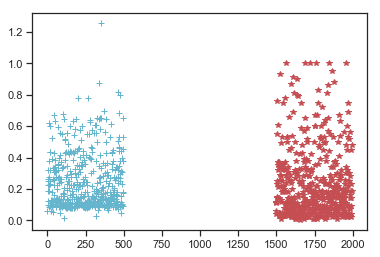

In [252]:
plt.plot(Y_pred, 'c+')
plt.plot(testY, 'r*')

# Test Error for Linear Regression : 0.789726

# 1.g. Ridge Regression Model 

In [254]:
from sklearn.linear_model import Ridge

In [267]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
alphas = 10**np.linspace(10,-2,100)*0.5

scaler = StandardScaler()
X_std = scaler.fit_transform(trainx)

regr_cv = RidgeCV(alphas, normalize=True)
model_cv = regr_cv.fit(X_std, trainy)

In [268]:
model_cv.alpha_

0.0466301673441609

In [271]:
print("Best Alpha Value : %f"% model_cv.alpha_)

Best Alpha Value : 0.046630


In [289]:
ridge = Ridge(alpha=0.0466301673441609).fit(trainx, trainy)  
print("Train Score : %f "% ridge.score(trainx,trainy))
print("Test Score : %f" % ridge.score(testx,testy))

Train Score : 0.710706 
Test Score : 0.620861


In [290]:
y_pred = ridge.predict(testx)
print("Mean Squared Error(Ridge Regression): %f" % mean_squared_error(y_pred,testy))

Mean Squared Error(Ridge Regression): 0.018030


### Ridge regression for selected features: Error is far more since the number of features considered is way too less

In [306]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
alphas = 10**np.linspace(10,-2,100)*0.5

scaler = StandardScaler()
X_std = scaler.fit_transform(trainX)

regr_cv = RidgeCV(alphas, normalize=True)
model_cv = regr_cv.fit(X_std, trainY)

model_cv.alpha_

print("Best Alpha Value : %f"% model_cv.alpha_)

ridge = Ridge(alpha=0.0466301673441609).fit(trainX, trainY)  
print("Train Score : %f "% ridge.score(trainX,trainY))
print("Test Score : %f" % ridge.score(testX,testY))

Y_pred_ridge = ridge.predict(testX)
print("Mean Squared Error for selected features(Ridge Regression): %f" % mean_squared_error(Y_pred,testY))

Best Alpha Value : 0.020185
Train Score : 0.574923 
Test Score : 0.518508
Mean Squared Error for selected features(Ridge Regression): 0.022898


# Best λ value chosen by cross-validation : 0.046630
# Test Error for Ridge Regression : 0.018030

# 1.h. LASSO Model

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100000, normalize = False) # 5 fold cross validation
lassocv.fit(trainx, trainy)

In [346]:
print("Best λ chosen by lassocv: %f" %lassocv.alpha_)

Best λ chosen by lassocv: 0.000116


In [348]:
plotlassocv.alphas_

array([4.07815216e-02, 3.80329835e-02, 3.54696877e-02, 3.30791495e-02,
       3.08497255e-02, 2.87705573e-02, 2.68315180e-02, 2.50231635e-02,
       2.33366860e-02, 2.17638715e-02, 2.02970594e-02, 1.89291055e-02,
       1.76533472e-02, 1.64635707e-02, 1.53539811e-02, 1.43191742e-02,
       1.33541097e-02, 1.24540874e-02, 1.16147236e-02, 1.08319301e-02,
       1.01018943e-02, 9.42106042e-03, 8.78611248e-03, 8.19395791e-03,
       7.64171257e-03, 7.12668672e-03, 6.64637189e-03, 6.19842866e-03,
       5.78067532e-03, 5.39107715e-03, 5.02773659e-03, 4.68888397e-03,
       4.37286889e-03, 4.07815216e-03, 3.80329835e-03, 3.54696877e-03,
       3.30791495e-03, 3.08497255e-03, 2.87705573e-03, 2.68315180e-03,
       2.50231635e-03, 2.33366860e-03, 2.17638715e-03, 2.02970594e-03,
       1.89291055e-03, 1.76533472e-03, 1.64635707e-03, 1.53539811e-03,
       1.43191742e-03, 1.33541097e-03, 1.24540874e-03, 1.16147236e-03,
       1.08319301e-03, 1.01018943e-03, 9.42106042e-04, 8.78611248e-04,
      

In [326]:
print("LASSO Coefficients :",lassocv.coef_)

LASSO Coefficients : [-0.          0.          0.27198908 -0.         -0.01548918  0.
  0.06630688 -0.26500756  0.          0.         -0.          0.04051855
  0.         -0.08474297  0.02656375 -0.09830653  0.04857451  0.0388039
 -0.10843719  0.         -0.         -0.05768278 -0.0211048  -0.03112233
  0.02901416  0.02271089  0.02393703 -0.         -0.14123178 -0.01816706
  0.          0.         -0.          0.13734735 -0.01577999  0.
  0.0102302   0.          0.11814669  0.13327799 -0.07847576 -0.
  0.         -0.         -0.196488   -0.03777154 -0.0101547   0.
 -0.12951339 -0.05737898  0.09843297 -0.06989643 -0.         -0.
 -0.         -0.00505088 -0.          0.          0.          0.03749658
  0.         -0.07106883 -0.         -0.06497544  0.04226671 -0.
 -0.         -0.05733568  0.21920734  0.05711974  0.00351135  0.12440176
 -0.0603639   0.          0.07355632 -0.05992484 -0.01588445  0.02419749
 -0.02420099 -0.01204544 -0.         -0.         -0.15888647  0.
  0.          

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


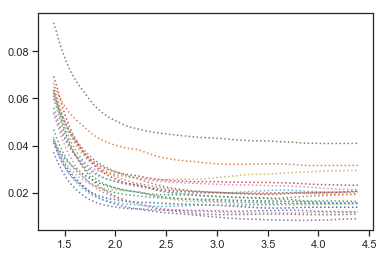

In [355]:
import time
import warnings;

t1 = time.time()
model = LassoCV(cv=20).fit(trainx, trainy)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')

In [357]:
print("LASSO Intercept:" + str(lassocv.intercept_))

LASSO Intercept:0.4261368855698766


In [358]:
y_pred_lasso = lassocv.predict(testx)
mse_lassocv = mean_squared_error(y_pred_lasso,testy)
print("MEAN SQUARE ERROR:" + str(mse_lassocv))
print("LASSO SCORE:" + str(lassocv.score(testx,testy)))

MEAN SQUARE ERROR:0.017763310017858247
LASSO SCORE:0.6264704501750185


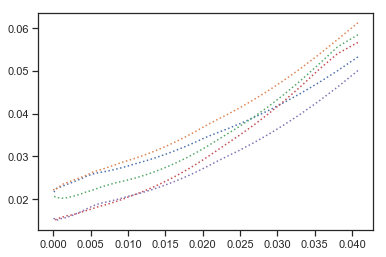

In [359]:
plt.plot(lassocv.alphas_, lassocv.mse_path_, ':')

## Normalized Dataset

In [321]:
key_columns=[]
for i in range(122):
    if lassocv.coef_[i]!=0:
        print(trainx.columns[i])
        key_columns.append(trainx.columns[i])

racepctblack numeric
racePctAsian numeric
agePct12t21 numeric
agePct12t29 numeric
pctUrban numeric
pctWWage numeric
pctWFarmSelf numeric
pctWInvInc numeric
pctWSocSec numeric
pctWPubAsst numeric
pctWRetire numeric
whitePerCap numeric
blackPerCap numeric
indianPerCap numeric
AsianPerCap numeric
OtherPerCap numeric
HispPerCap numeric
PctPopUnderPov numeric
PctLess9thGrade numeric
PctEmploy numeric
PctEmplManu numeric
PctOccupManu numeric
MalePctDivorce numeric
MalePctNevMarr numeric
FemalePctDiv numeric
PctKids2Par numeric
PctYoungKids2Par numeric
PctTeen2Par numeric
PctWorkMom numeric
NumIlleg numeric
PctIlleg numeric
NumImmig numeric
PctImmigRec10 numeric
PctRecImmig10 numeric
PctNotSpeakEnglWell numeric
PctLargHouseOccup numeric
PersPerOccupHous numeric
PctPersOwnOccup numeric
PctPersDenseHous numeric
PctHousLess3BR numeric
MedNumBR numeric
HousVacant numeric
PctHousOccup numeric
PctVacantBoarded numeric
PctVacMore6Mos numeric
MedYrHousBuilt numeric
PctHousNoPhone numeric
PctWOFullPlu

In [ ]:
lassocv_n = LassoCV(alphas = None, cv = 5, max_iter = 100000, normalize = True) # 5 fold cross validation
lassocv_n.fit(trainx, trainy)

In [331]:
print("Best λ chosen by lassocv: %f" %lassocv_n.alpha_)

Best λ chosen by lassocv: 0.000023


In [332]:
print("LASSO Coefficients :",lassocv_n.coef_)

LASSO Coefficients : [-0.          0.          0.26268374 -0.         -0.         -0.
  0.05265268 -0.23565096  0.          0.         -0.          0.03616875
  0.         -0.05490705  0.01708869 -0.10952719  0.04571327  0.02117298
 -0.09965086  0.         -0.         -0.03467882 -0.01942257 -0.03101125
  0.02553978  0.01915535  0.01891117 -0.         -0.10321077 -0.00430008
  0.         -0.         -0.          0.10292762 -0.00274996  0.
  0.         -0.          0.09151321  0.1004491  -0.03602207 -0.
  0.         -0.         -0.19022021 -0.0390031  -0.00524226 -0.
 -0.11627141 -0.0284242   0.11051152 -0.08279268 -0.         -0.00240049
 -0.         -0.00073894  0.          0.          0.          0.02145688
  0.         -0.02723772 -0.         -0.01361073  0.         -0.
  0.         -0.03972786  0.17610561  0.05090063  0.          0.11021696
 -0.06106127 -0.          0.06598454 -0.05012983 -0.0112609   0.00286717
 -0.02012966 -0.         -0.         -0.         -0.11273999  0.
  0. 

In [333]:
print("LASSO Intercept:" + str(lassocv_n.intercept_))

LASSO Intercept:0.4017012634210074


In [334]:
y_pred_lasson = lassocv_n.predict(testx)
mse_lassocv_n = mean_squared_error(y_pred_lasson,testy)
print("MEAN SQUARE ERROR:" + str(mse_lassocv_n))
print("LASSO SCORE:" + str(lassocv_n.score(testx,testy)))

MEAN SQUARE ERROR:0.01778416702620012
LASSO SCORE:0.6260318658723855


# LASSO Test Error for Non-normalized variables :  
### MEAN SQUAR ERROR : 0.017763310017858247 LASSO SCORE : 0.6264704501750185
# LASSO Test Error for Normalized variables : 
### MEAN SQUARE ERROR : 0.01778416702620012  LASSO SCORE : 0.6260318658723855
## The test errors vary very little when normalized since the dataset is already normalized!

# 1.i. PCR model

In [362]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_validate

In [376]:
from sklearn.decomposition import PCA
pca = PCA()
X_PCA = pca.fit_transform(scale(trainx))
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(X_PCA.shape)

(1495, 122)


In [377]:
CVF = KFold(n_splits=10, shuffle=True, random_state=2)

In [378]:
reg = LinearRegression()

In [379]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
#choose num of components via cross validation score
mse=[]
for i in range(1, 122):
    score = -1*model_selection.cross_val_score(reg, X_PCA[:,:i], trainy, cv=CVF, scoring='neg_mean_squared_error').mean()
    mse.append(score)
#print len(mse)

In [382]:
min(mse)

0.019521488249654988

In [393]:
mse.index(min(mse))

94

In [390]:
mse[10]

0.02103575582244201

In [383]:
print("PCA Components:  \n" + str(pca.components_))

PCA Components:  
[[ 6.27890215e-02 -5.25348436e-03  1.07610796e-01 ...  8.39759596e-03
   4.98983075e-02  6.15156184e-03]
 [ 1.05398459e-01  1.09635409e-01  6.03540252e-03 ...  9.98255448e-03
   5.66080772e-02  2.29756670e-02]
 [ 1.95802117e-01 -1.58170025e-01  6.67594904e-02 ...  1.16506099e-03
   5.99049016e-02  6.75513176e-02]
 ...
 [-2.38180564e-02 -3.35362895e-03  6.44729151e-03 ...  1.48705359e-04
   2.60834768e-04  4.86496634e-03]
 [ 1.74667169e-02 -3.97465378e-03 -5.09449351e-04 ...  2.61672397e-04
   1.43132110e-03 -2.85164589e-03]
 [-3.04216509e-05  2.93531350e-06  8.45232043e-06 ...  3.18432515e-06
   1.00848983e-04 -8.02244745e-06]]


In [384]:
print("PCA Variance:   \n" +str(pca.explained_variance_)) # var in all cross diag

PCA Variance:   
[2.58905682e+01 1.73059417e+01 1.07363609e+01 8.42630570e+00
 7.01627252e+00 4.86162369e+00 4.10096568e+00 3.77577748e+00
 3.10953789e+00 2.50242367e+00 2.07924366e+00 1.79147972e+00
 1.71591392e+00 1.63748385e+00 1.51312640e+00 1.33949320e+00
 1.29459828e+00 1.11214047e+00 1.04688200e+00 1.04133272e+00
 9.78218116e-01 9.18087660e-01 8.85367341e-01 8.61840264e-01
 8.31815115e-01 7.65078654e-01 7.30676759e-01 6.99505991e-01
 6.44544830e-01 5.83985345e-01 5.81124496e-01 5.65209477e-01
 5.25431149e-01 4.96722693e-01 4.83209741e-01 4.59039834e-01
 4.40788624e-01 4.24891863e-01 4.07155867e-01 3.90697716e-01
 3.74480726e-01 3.54636651e-01 3.47845465e-01 3.05814015e-01
 2.99090205e-01 2.88682189e-01 2.60756397e-01 2.51922933e-01
 2.38263443e-01 2.24578462e-01 2.16222466e-01 2.03236538e-01
 1.96409328e-01 1.93960189e-01 1.79490023e-01 1.72765381e-01
 1.64326653e-01 1.60247999e-01 1.53131810e-01 1.38907176e-01
 1.32307117e-01 1.30878342e-01 1.18822691e-01 1.12728468e-01
 1.0610

Text(0,0.5,'MSE')

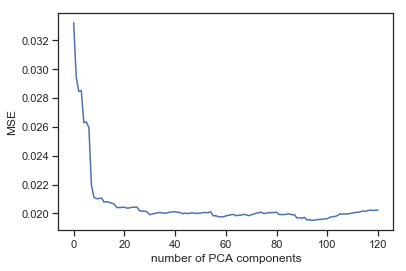

In [385]:
plt.figure();
plt.plot(mse)
plt.xlabel('number of PCA components')
plt.ylabel('MSE')

In [466]:
reducedTestX = pca.transform(testx);
score = -1*model_selection.cross_val_score(reg, reducedTestX[:,:60], testy, cv=CVF, scoring='neg_mean_squared_error').mean()
print("Test MSE=",score)

Test MSE= 0.01872974526853524


In [460]:
score = -1*model_selection.cross_val_score(reg, X_PCA[:,:10], trainy, cv=CVF, scoring='neg_mean_squared_error').mean()
print("Train MSE=",score)

Train MSE= 0.021026298476544827


## The above graph indicates that by choosing the first few components of PCA which have highest variance like 10; the MSE difference between first 10 PCA components and 122 PCA components is almost same. Therefore use first few PCA components it will be faster.
## MSE is at M=94
## Optimal M would be to choose 60 with Test Error: 0.01872974526853524

# 1.j. Boosting Tree

In [418]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(reg_alpha=1,n_jobs=4) # for L1 settingthe reg_alpha as 1 for L2 its 2
xgb_model.fit(trainx, trainy)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [439]:
y_pred_bt = xgb_model.predict(testx)
accuracy = xgb_model.score(testx, testy)
print("Accuracy:"+ str(accuracy * 100.0))
print("MSE for test= %f"% mean_squared_error(y_pred_bt,testy))

Accuracy:64.4853879074749
MSE for test= 0.016889


In [442]:
# determine lambda using CV
params = {
 'learning_rate':[0.0, 0.001, 0.005, 0.01, 0.02,0.03,0.04,0.05,0.06,0.07,0.8,0.09,0.1,0.3,0.6,1]
}
gridSearch = model_selection.GridSearchCV(xgb_model,param_grid = params, cv=5)

gridSearch.fit(trainx,trainy)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.0, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.8, 0.09, 0.1, 0.3, 0.6, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [450]:
print(gridSearch.score)
print(gridSearch.best_params_) 
print("Best Score :")
print(gridSearch.best_score_)

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.0, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.8, 0.09, 0.1, 0.3, 0.6, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>
{'learning_rate': 0.09}
Best Score :
0.6490230684781094


# α chosen = 0.09
# Best Score : 0.6490230684781094
# MSE : 0.016889